# 4. Davies-Bouldin Index (DBI)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from  k_means_functions import plot_k_means, get_simple_data

$$\text{DBI} = \frac{1}{K}\sum_{k=1}^{K} \max_{j \neq k } |\frac{ \sigma_k + \sigma_j}{d(c_k,c_j)} |$$

$\sigma_k :$  average distance from each data point in cluster $k$ to its center

$d(c_k,c_j) :$ distance from center of cluster $k$ to center of cluster $j$

DBI : _lower is better_

In [2]:
# hard labels
def DBI2(X, R):
    N, D = X.shape
    _, K = R.shape

    # get sigmas, means first
    sigma = np.zeros(K)
    M = np.zeros((K, D))
    assignments = np.argmax(R, axis=1)
    
    #เข้าถึงแต่ละ cluster k
    for k in range(K):
        Xk = X[assignments == k]
        M[k] = Xk.mean(axis=0)
        # assert(Xk.mean(axis=0).shape == (D,))
        n = len(Xk)
        diffs = Xk - M[k]
        sq_diffs = diffs * diffs
        sigma[k] = np.sqrt( sq_diffs.sum() / n )


    # calculate Davies-Bouldin Index
    dbi = 0
    for k in range(K):
        max_ratio = 0
        for j in range(K):
            if k != j:
                numerator = sigma[k] + sigma[j]
                denominator = np.linalg.norm(M[k] - M[j])
                ratio = numerator / denominator
                if ratio > max_ratio:
                    max_ratio = ratio
        dbi += max_ratio
    return dbi / K



def DBI(X, M, R):
    # ratio between sum of std deviations between 2 clusters / distance between cluster means
    # lower is better
    N, D = X.shape
    K, _ = M.shape

    # get sigmas first
    sigma = np.zeros(K)
    for k in range(K):
        diffs = X - M[k] # should be NxD
        squared_distances = (diffs * diffs).sum(axis=1) # now just N
        weighted_squared_distances = R[:,k]*squared_distances
        sigma[k] = np.sqrt( weighted_squared_distances.sum() / R[:,k].sum() )

    # calculate Davies-Bouldin Index
    dbi = 0
    for k in range(K):
        max_ratio = 0
        for j in range(K):
            if k != j:
                numerator = sigma[k] + sigma[j]
                denominator = np.linalg.norm(M[k] - M[j])
                ratio = numerator / denominator
                if ratio > max_ratio:
                    max_ratio = ratio
        dbi += max_ratio
    return dbi / K


## Implementation

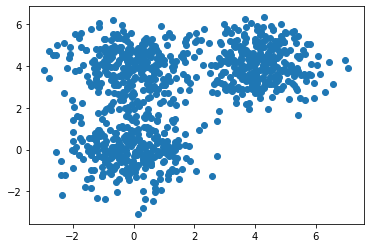

In [3]:
X = get_simple_data()
plt.scatter(X[:,0],X[:,1] )
plt.show()

Final cost 1666.1018381489055
DBI: 0.6722442699382113
DBI 2 (hard clusters): 0.6680672765420675


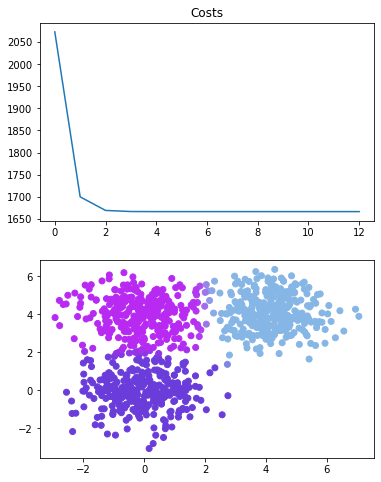

In [8]:
K = 3
M,R = plot_k_means(X, K, beta=1.0, show_plots=True)
print("DBI:", DBI(X, M, R))
print("DBI 2 (hard clusters):", DBI2(X, R))

Final cost 3981.0639282841184
DBI: 0.8387150906730086
DBI 2 (hard clusters): 0.8296036308933081


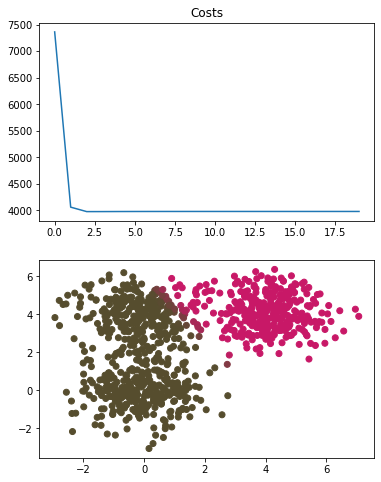

In [9]:
K = 2
M,R = plot_k_means(X, K, beta=1.0, show_plots=True)
print("DBI:", DBI(X, M, R))
print("DBI 2 (hard clusters):", DBI2(X, R))

Final cost 1359.682314420762
DBI: 1.4153303261681596
DBI 2 (hard clusters): 1.1919767053973487


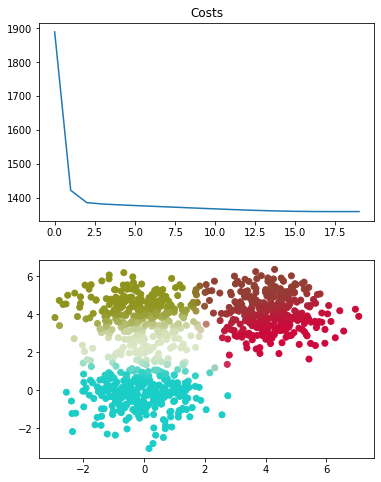

In [10]:
K = 5
M,R = plot_k_means(X, K, beta=1.0, show_plots=True)
print("DBI:", DBI(X, M, R))
print("DBI 2 (hard clusters):", DBI2(X, R))

Final cost 3981.063950412761
DBI: 0.838715147681027
DBI 2 (hard clusters): 0.8296036308933081


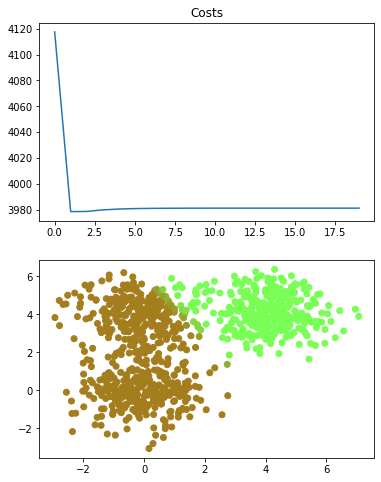

In [11]:
K = 2
M,R = plot_k_means(X, K, beta=1.0, show_plots=True)
print("DBI:", DBI(X, M, R))
print("DBI 2 (hard clusters):", DBI2(X, R))

In [12]:
# K = 3 is the best

In [13]:
# อย่าลืมนำเอาfunction ไปรวมไว้ในไฟล์ k_means_functions.py